In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download NLTK resources 
nltk.download('punkt')
nltk.download('stopwords')

#CSV file named 'movies.csv'
movies = pd.read_csv('movies.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# EDA Steps
stop_words = set(stopwords.words('english'))
title_words = movies['Title'].str.lower().str.cat(sep=' ').split()
title_word_counts = Counter(w for w in title_words if w.isalnum() and w not in stop_words)

title_lengths_chars = movies['Title'].str.len()
title_lengths_words = movies['Title'].apply(lambda x: len(x.split()))

duplicate_titles = movies[movies['Title'].duplicated()]['Title'].unique()

# Answering the Questions
print("1. Most common words in movie titles:\n", title_word_counts.most_common(10))
print("\n2. Average length of movie titles (characters):", title_lengths_chars.mean())
print("   Average length of movie titles (words):", title_lengths_words.mean())
print("\n3. Duplicate titles:\n", duplicate_titles)

1. Most common words in movie titles:
 [('2', 20), ('man', 12), ('girl', 10), ('love', 8), ('dark', 8), ('3', 8), ('life', 7), ('part', 7), ('american', 7), ('secret', 6)]

2. Average length of movie titles (characters): 14.539
   Average length of movie titles (words): 2.605

3. Duplicate titles:
 ['The Host']



1. Most frequent genres:
 [('action,adventure,sci-fi', 50), ('drama', 48), ('comedy,drama,romance', 35), ('comedy', 32), ('drama,romance', 31), ('action,adventure,fantasy', 27), ('animation,adventure,comedy', 27), ('comedy,drama', 27), ('comedy,romance', 26), ('crime,drama,thriller', 24)]

2. Most frequent genre combinations:
 [(('action,adventure,sci-fi',), 50), (('drama',), 48), (('comedy,drama,romance',), 35), (('comedy',), 32), (('drama,romance',), 31), (('action,adventure,fantasy',), 27), (('animation,adventure,comedy',), 27), (('comedy,drama',), 27), (('comedy,romance',), 26), (('crime,drama,thriller',), 24)]


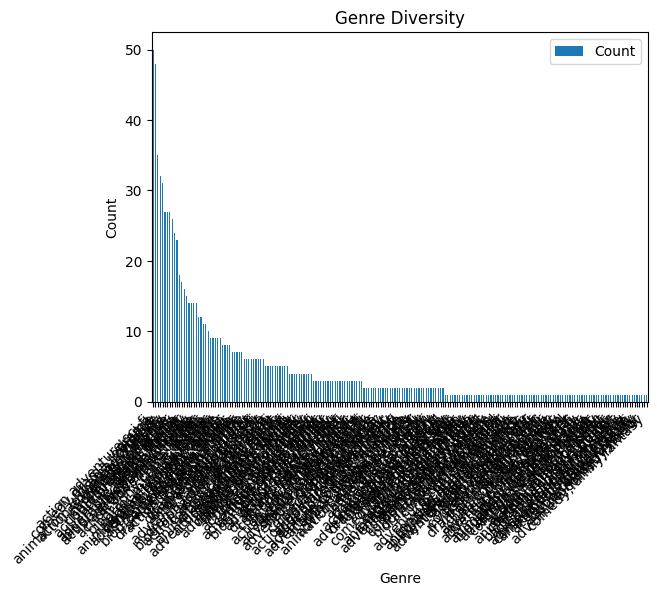


3. Genre diversity is visualized in the bar chart above.


In [16]:
# EDA Steps
all_genres = movies['Genre'].str.lower().str.cat(sep='|').split('|')
genre_counts = Counter(all_genres)

genre_combinations = movies['Genre'].str.lower().str.split('|').apply(lambda x: tuple(sorted(x)))
combination_counts = Counter(genre_combinations)

# Answering the Questions
print("\n1. Most frequent genres:\n", genre_counts.most_common(10))
print("\n2. Most frequent genre combinations:\n", combination_counts.most_common(10))

# Visualization for Genre Diversity
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])
genre_counts_df.sort_values(by='Count', ascending=False).plot(kind='bar')
plt.title('Genre Diversity')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
print("\n3. Genre diversity is visualized in the bar chart above.")

In [17]:
# EDA Steps
description_lengths_chars = movies['Description'].str.len()
description_lengths_words = movies['Description'].apply(lambda x: len(x.split()))

stop_words = set(stopwords.words('english'))
description_words = movies['Description'].str.lower().str.cat(sep=' ').split()
description_word_counts = Counter(w for w in description_words if w.isalnum() and w not in stop_words)

missing_descriptions = movies['Description'].isnull().sum()

# Answering the Questions
print("\n1. Average length of movie descriptions (characters):", description_lengths_chars.mean())
print("   Average length of movie descriptions (words):", description_lengths_words.mean())
print("\n2. Most frequent words in descriptions:\n", description_word_counts.most_common(10))
print("\n3. Number of missing descriptions:", missing_descriptions)

# Basic Keyword Analysis (Example)
keyword = "love"
movies_with_keyword = movies[movies['Description'].str.contains(keyword, na=False)]
print(f"\n4. Example: Movies with keyword '{keyword}':\n", movies_with_keyword[['Title', 'Genre']])
print("   Further analysis is needed to identify keywords associated with specific genres or ratings.")


1. Average length of movie descriptions (characters): 163.232
   Average length of movie descriptions (words): 27.921

2. Most frequent words in descriptions:
 [('young', 123), ('new', 105), ('two', 80), ('life', 76), ('must', 69), ('man', 68), ('world', 66), ('one', 61), ('find', 55), ('finds', 52)]

3. Number of missing descriptions: 0

4. Example: Movies with keyword 'love':
                           Title                    Genre
39                    5- 25- 77             Comedy,Drama
47                       Fallen  Adventure,Drama,Fantasy
70                  The Promise            Drama,History
103                Contratiempo   Crime,Mystery,Thriller
112               The Bad Batch           Romance,Sci-Fi
..                          ...                      ...
941  The Twilight Saga: Eclipse  Adventure,Drama,Fantasy
943         What's Your Number?           Comedy,Romance
952          Sex and the City 2     Comedy,Drama,Romance
975  My Big Fat Greek Wedding 2    Comedy,Famil

In [18]:
# EDA Steps
director_counts = movies['Director'].value_counts()
director_genre_counts = movies.groupby(['Director', 'Genre'])['Title'].count().reset_index()
director_rating_stats = movies.groupby('Director')['Rating'].agg(['mean', 'count'])
director_year_counts = movies.groupby(['Director', 'Year'])['Title'].count().reset_index()
multiple_movies_in_year = director_year_counts[director_year_counts['Title'] > 1]

# Answering the Questions
print("\n1. Most frequent directors:\n", director_counts.head(10))
print("\n2. Director-genre associations (top 10):\n", director_genre_counts.sort_values(by='Title', ascending=False).head(10))
print("   Director rating statistics (top 10):\n", director_rating_stats.sort_values(by=['mean', 'count'], ascending=[False, False]).head(10))
print("\n3. Directors with multiple movies in the same year:\n", multiple_movies_in_year)


1. Most frequent directors:
 Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Zack Snyder           5
Denis Villeneuve      5
Woody Allen           5
Peter Berg            5
Danny Boyle           5
Name: count, dtype: int64

2. Director-genre associations (top 10):
            Director                     Genre  Title
610     Michael Bay   Action,Adventure,Sci-Fi      4
222     David Yates  Adventure,Family,Fantasy      4
502      Justin Lin     Action,Crime,Thriller      4
529  Lars von Trier                     Drama      3
392       James Wan   Horror,Mystery,Thriller      3
717   Peter Jackson         Adventure,Fantasy      3
116    Bryan Singer   Action,Adventure,Sci-Fi      3
689       Paul Feig       Action,Comedy,Crime      2
231    Dennis Dugan                    Comedy      2
636   Mike Flanagan           Horror,Thriller      2
   Director rating statistics (top 10):
                             

In [19]:
# EDA Steps
all_actors = movies['Actors'].str.lower().str.cat(sep='|').split('|')
actor_counts = Counter(all_actors)

from itertools import combinations
actor_pairs = []
for actors in movies['Actors'].str.lower().str.split('|'):
    for pair in combinations(actors, 2):
        actor_pairs.append(tuple(sorted(pair)))
pair_counts = Counter(actor_pairs)

actor_genre_counts = movies.assign(Actors=movies['Actors'].str.lower().str.split('|')).explode('Actors').groupby(['Actors', 'Genre'])['Title'].count().reset_index()
actor_rating_stats = movies.assign(Actors=movies['Actors'].str.lower().str.split('|')).explode('Actors').groupby('Actors')['Rating'].agg(['mean', 'count'])

# Answering the Questions
print("\n1. Most frequent actors:\n", actor_counts.most_common(10))
print("\n2. Most frequent actor pairs:\n", pair_counts.most_common(10))  # Basic co-occurrence
print("\n3. Actor-genre associations (top 10):\n", actor_genre_counts.sort_values(by='Title', ascending=False).head(10))
print("   Actor rating statistics (top 10):\n", actor_rating_stats.sort_values(by=['mean', 'count'], ascending=[False, False]).head(10))


1. Most frequent actors:
 [('daniel radcliffe, emma watson, rupert grint, michael gambon', 2), ('shia labeouf, megan fox, josh duhamel, tyrese gibson', 2), ('jennifer lawrence, josh hutcherson, liam hemsworth, woody harrelson', 2), ('gerard butler, aaron eckhart, morgan freeman,angela bassett', 2), ('chris pratt, vin diesel, bradley cooper, zoe saldana', 1), ('noomi rapace, logan marshall-green, michael fassbender, charlize theron', 1), ('james mcavoy, anya taylor-joy, haley lu richardson, jessica sula', 1), ('matthew mcconaughey,reese witherspoon, seth macfarlane, scarlett johansson', 1), ('will smith, jared leto, margot robbie, viola davis', 1), ('matt damon, tian jing, willem dafoe, andy lau', 1)]

2. Most frequent actor pairs:
 []

3. Actor-genre associations (top 10):
                                                 Actors  \
872  shia labeouf, megan fox, josh duhamel, tyrese ...   
460  jennifer lawrence, josh hutcherson, liam hemsw...   
670  meryl streep, pierce brosnan, amand